# **Tell Me What You Want, I'll Tell You What You Like**

In this file, we try to use the first clustering approach (the basic version) (random exploration)

## DOcplex Python API installation

First, we install the docplex python API which we will use for modelling our problem and solving it. (Then, we will not have problem size error)

In [4]:
import sys
try:
    import docplex.mp
except:
    if hasattr(sys, 'real_prefix'):
        !pip install docplex -q
        print("!pip install docplex -q...")
    else:
        !pip install --user docplex -q
        print("!pip install --user docplex -q...")
        
print("End of the intallation of python API...")

End of the intallation of python API...


## Main code

In [5]:
#############################
### Import libraries ###
#############################

from docplex.cp.model import *
from docplex.cp.config import get_default
import numpy as np
from Solver import *
from User import *
import time

In [6]:
#############################
### Essentials functions ###
#############################
import FunctionMain as fm

In [7]:
# ----------------- Parameters

# The file to consider
file = './file_with_optimal_val/la04.txt'

# The number of solutions that we will have in the solver during the first iteration
k = 10

# The number of layer which is fixed
nb_layers = 5

# Variable which display the solution
display_sol = False

# Variable which display the start (in a vector)
display_start = False

# Variable which display the start (in a matrix)
display_matrix = False

# Time stop criterion 
tps_max = 300

# Number of iteration stop criterion
it_max = 20



# The number of solutions that we will have in the solver after the first iteration
k_k = 10

list_search_type = ["DepthFirst", "Restart", "MultiPoint", "IterativeDiving"]

In [8]:
#############################
### Main program ###
#############################

print("\n--------Main program is loading...---------")

# --------- Interaction with the solver
data = []
n, m, data, T_machine, T_duration, duration, optimalval = fm.get_data_from_file(file)

# --------- Call Solver constructor in Solver.py and create the variables of the model
model, solver, tasks = fm.initialize_solver(data, n, m, duration)

model, variables = solver.create_constraints(model, n, m, optimalval, T_machine)

# ------------ Solve the model
print("\nSolving the model...")
msol, nb_solution, runtime = solver.solve(model, k_k, n, m, variables)

# ------------ Display the result
fm.display_solution(msol, display_sol)
print("Model solved !")

# ---------------- Interaction with the user
print("\n--------Interaction with the user...---------")
print("\nCreating the user...")
user = User()
print("User created !")

#Get the variables of the model

# list_indice, list_obj, pref, list_layers, list_equal = fm.user_preferences(msol, user, nb_layers, n, m)
list_indice, list_obj, pref, list_layers, list_equal = fm.user_preferences(msol, user, nb_layers, n,optimalval, m)

# Vector of the start time of each task of each preference
starts = user.start_pref(n, m, display_start)

# Matrix of the start time of each task of each preference
matrix = user.matrix_pref(n, m, display_matrix)

# Testing the order of preferences and the differences between solutions
fm.test(n, m, user)

print("list layers : ",list_layers)



--------Main program is loading...---------

Creating the model variables...
Model tasks_by_jobs created !

Solver initialized !

Adding precedence constraints to the solver...
Precedence constraints added !

Adding disjunctive constraints to the solver...
Disjunctive constraints added !

Solving the model...
Model solved !

--------Interaction with the user...---------

Creating the user...
User created !

Classing solutions...
Solutions classed !

Creating preferences...
Preferences created !

Testing order of preferences...
	L'ordre des préférences est cohérente

Testing differences between solutions...
	Toutes les solutions sont différentes
list layers :  [[<docplex.cp.solution.CpoSolveResult object at 0x00000201B6B626C0>], [<docplex.cp.solution.CpoSolveResult object at 0x00000201C1AD9A40>, <docplex.cp.solution.CpoSolveResult object at 0x00000201BA6A7CC0>, <docplex.cp.solution.CpoSolveResult object at 0x00000201C26A69C0>, <docplex.cp.solution.CpoSolveResult object at 0x00000201C20

In [9]:
# ####################################################################
# #### NOUVELLES SOLUTIONS ET NOUVEAUX CLUSTERING A CHAQUE ITERATION
# ####################################################################

# import clustering as cl

# ###  -------------- Iteration of the solver with the preferences
# it = 1
# tps = runtime
# list_min_obj = [min(list_obj)]
# list_min_obj_global = [min(list_obj)]

# criterion = (tps < tps_max) and (it < it_max) 

# # ----------------- Add the preferences to the model
# while criterion :
#     print("\n--------Iteration {}---------".format(it))

#     # --------- Call Solver constructor in Solver.py and create the variables of the model
#     model, solver, tasks = fm.initialize_solver(data, n, m, duration)

#     # --------- Add the new constraints to the model (that solution must be different from the previous generated solutions)
#     variables = fm.update_variables_new_constraint(n, m,  pref, model, solver)
    
#     # --------- Add the constraints considering the clustering
#     if it > 1:
#         model, variables = solver.create_constraints(model, n, m, list_min_obj_global[it-1], T_machine)
#     else :
#         model, variables = solver.create_constraints(model, n, m, optimalval, T_machine)
    
#     #------------------ Layers creation 
#     # layers = cl.create_layers(list_equal, matrix)
#     layers = cl.create_layers_fixed(list_layers)
#     print(len(layers))
#     # print(len(layers[i]) for i in range (len(layers)))
#         #------------------ Définition du nombre de clusters par layer (liste des nb de clusters par layer)
#     nb_clusters = fm.choose_best_clusters(layers)

#     default_value_rayon = 5 

#     for l in range(len(layers)):
#         data = layers[l]
#         k = nb_clusters[l]

#         print("-------------- Layer", l, "-----------------")
#         print("Number of clusters :", k)
#         print("Number of solutions :", len(data))

#         if l > 0:
#             #------------------ If there is only one solution in the layer, we add a constraint to the model
#             if(len(data)==0):
#                 continue
#             elif (len(data) == 1):
#                 solver.add_constraint(model, fm.manhattan_distance(data[0], [model.start_of(variables[i//m][i%m]) for i in range(n*m)]) > default_value_rayon + l)
#                 continue
#             else :
#             #------------------ Get the average of each cluster
#                 k, avg, labels = fm.average_computation(data, k)

#             #------------------ Get the solutions which is the closest to the average of each cluster
#                 the_ones = fm.solution_average(k, data, labels, avg)
                
#             #------------------ Ajout de contraintes, les solutions doivent etre distantes des centres de clusters, en chaque layer , d'une distance supérieure au rayon du cluster + l
#                 #------------------ Liste des solutions des clusters de la layer l

#                 for i in range(k):
#                     sol_cluster=[]
#                     for j in range(len(data)):
#                         if labels[j]==i:
#                             sol_cluster.append(data[j])
#                 #------------------ Ajout des contraintes
#                     solver.add_constraint(model, fm.manhattan_distance(the_ones[i],[ model.start_of(variables[i//m][i%m]) for i in range(n*m)]) >  fm.rayon_cluster(the_ones[i], sol_cluster) + l)
            

#     # ------------ Solve the model
#     print("\nSolving the model...")
#     # msol, nb_solution, runtime = solver.solve(model, k_k, n, m, it, T_machine, optimalval, list_search_type[it%4])
#     msol, nb_solution, runtime = solver.solve(model, k_k, n, m, variables)
#     print("The number of solutions generated is :",nb_solution)
#     list = []
#     for sol in msol:
#         list.append(user.objectiveFunction(sol)+user.objectiveFunctionRegularity(sol, n, m))

#     list_min_obj.append(min(list))
#     print("Objective function :", list_min_obj)

#     # ------------ Display the result
#     fm.display_solution(msol, display_sol)
#     print("Model solved !")

#     # ---------------- Interaction with the user
#     list_indice, list_obj, pref, list_layers, list_equal = fm.user_preferences(msol, user, nb_layers, n, m)
#     print("Il y a {} solution(s)".format(len(pref)))

#     list_min_obj_global.append(min(list_obj))
#     print("Objective function global :", list_min_obj_global)

#     # Vector of the start time of each task of each preference
#     starts = user.start_pref(n, m, display_start)

#     # Matrix of the start time of each task of each preference
#     matrix = user.matrix_pref(n, m, display_matrix)

#     # Testing the order of preferences and the differences between solutions
#     fm.test(n, m, user)


# #------------------ Condition d'arrêt ------------------
#     tps += runtime
#     criterion = (tps < tps_max) and (it < it_max)
#     fm.stopCondition(it, it_max, tps, tps_max)

#     it += 1

In [10]:
####################################################################
#### NOUVELLES SOLUTIONS ET NOUVEAUX CLUSTERING A CHAQUE ITERATION
####################################################################

import clustering as cl
import decision_tree as dt

###  -------------- Iteration of the solver with the preferences
it = 1
tps = runtime
list_min_obj = [min(list_obj)]
list_min_obj_global = [min(list_obj)]

criterion = (tps < tps_max) and (it < it_max) 

# ----------------- Add the preferences to the model
while criterion :
    print("\n--------Iteration {}---------".format(it))
    clf, feuilles_conditions = dt.my_decision_tree(n, m, list_layers)

    # --------- Call Solver constructor in Solver.py and create the variables of the model
    model, solver, tasks = fm.initialize_solver(data, n, m, duration)

    # --------- Add the new constraints to the model (that solution must be different from the previous generated solutions)
    variables = fm.update_variables_new_constraint(n, m,  pref, model, solver)
    
    
    order = model.binary_var(name="order")
    solver.add_variable(order)
    # --------- Add the new constraints to the model (concerning the order)
    list_variables = [model.start_of(variables[i//m][i%m]) for i in range(n*m)]
    constraint_list_of_tree = dt.constraint_tree(order,list_variables, feuilles_conditions)

    for constraint in constraint_list_of_tree:
        solver.add_constraint(model, constraint)
    solver.add_constraint(model, equal(order, 1))

    
    

    # ------------ Solve the model
    print("\nSolving the model...")
    # msol, nb_solution, runtime = solver.solve(model, k_k, n, m, it, T_machine, optimalval, list_search_type[it%4])
    model, variables = solver.create_constraints(model, n, m, optimalval, T_machine)
    msol, nb_solution, runtime = solver.solve(model, k_k, n, m, variables)
    print("The number of solutions generated is :",nb_solution)
    list = []
    for sol in msol:
        list.append(user.objectiveFunction(sol))

    list_min_obj.append(min(list))
    print("Objective function :", list_min_obj)

    # ------------ Display the result
    fm.display_solution(msol, display_sol)
    print("Model solved !")

    # ---------------- Interaction with the user
    # list_indice, list_obj, pref, list_layers, list_equal = fm.user_preferences(msol, user, nb_layers, n, m)
    list_indice, list_obj, pref, list_layers, list_equal = fm.user_preferences(msol, user, nb_layers, n, optimalval, m)
    print("Il y a {} solution(s)".format(len(pref)))

    list_min_obj_global.append(min(list_obj))
    print("Objective function global :", list_min_obj_global)

    # Vector of the start time of each task of each preference
    starts = user.start_pref(n, m, display_start)

    # Matrix of the start time of each task of each preference
    matrix = user.matrix_pref(n, m, display_matrix)

    # Testing the order of preferences and the differences between solutions
    fm.test(n, m, user)


#------------------ Condition d'arrêt ------------------
    tps += runtime
    criterion = (tps < tps_max) and (it < it_max)
    fm.stopCondition(it, it_max, tps, tps_max)

    it += 1


--------Iteration 1---------
best score:  1.0

Creating the model variables...
Model tasks_by_jobs created !

Solver initialized !
['34 <= 598.5', 0]
<class 'list'>
['34 > 598.5', 1]
<class 'list'>

Solving the model...

Adding precedence constraints to the solver...
Precedence constraints added !

Adding disjunctive constraints to the solver...
Disjunctive constraints added !
The number of solutions generated is : 6771
Objective function : [706, 696]
Model solved !

Classing solutions...
Solutions classed !

Creating preferences...
Preferences created !
Il y a 20 solution(s)
Objective function global : [706, 696]

Testing order of preferences...
	L'ordre des préférences est cohérente

Testing differences between solutions...
	Toutes les solutions sont différentes

--------Iteration 2---------
best score:  0.5

Creating the model variables...
Model tasks_by_jobs created !

Solver initialized !
['37 <= 441.5', 0]
<class 'list'>
['37 > 441.5', 1]
<class 'list'>

Solving the model...

Ad

[706, 696, 703, 725, 704, 671, 699, 696, 801, 689, 728, 696, 690, 639, 745]


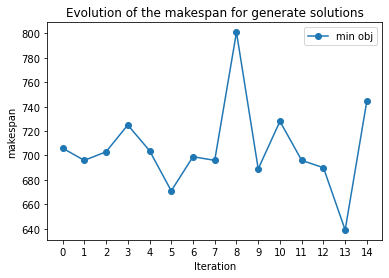

In [11]:
# Plot du minimum de l'objectif parmis les nouvelles solutions générées

import matplotlib.pyplot as plt
print(list_min_obj)
plt.plot([i for i in range(it)], list_min_obj, label='min obj', marker='o')
plt.xlabel("Iteration")
plt.ylabel("makespan")
plt.title("Evolution of the makespan for generate solutions")
plt.xticks(range(it))
plt.legend()
plt.show() 

[706, 696, 696, 696, 696, 671, 671, 671, 671, 671, 671, 671, 671, 639, 639]


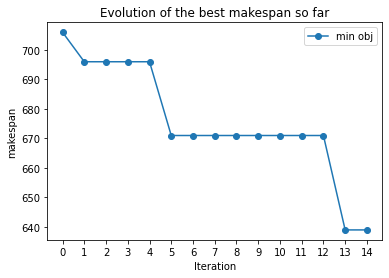

In [12]:
# Plot du minimum de l'objectif parmis les solutions générées so far

print(list_min_obj_global)
plt.plot([i for i in range(it)], list_min_obj_global, label='min obj', marker='o')
plt.xlabel("Iteration")
plt.ylabel("makespan")
plt.title("Evolution of the best makespan so far")
plt.xticks(range(it))
plt.legend()
plt.show() 

In [13]:
pref = user.getPreferences()
print(len(pref))

# ------------ Generate Gantt Chart
start_times = []
end_times = []
task_lengths = []

n_sol = 0
for sol in pref:
    n_sol = n_sol + 1
    sol_list = sol.get_all_var_solutions()
    
    mkspan=max([sol_list[i].get_end() for i in range(len(sol_list))] )
    x = [ [] for i in range(m)]
    y = [ [] for i in range(m)]
    mp = [ {} for i in range(m)]
    sz=len(sol_list)
    for i in range(sz) : 
        ind=T_machine[i]
        x[ind].append(sol_list[i].get_start())
        mp[ind][sol_list[i].get_start()]=ind
        x[ind].append(sol_list[i].get_end())
        mp[ind][sol_list[i].get_end()]=ind+1
    eps=0.5
    for i in range(m):
        x[i]=sorted(x[i])
        y[i]=[mp[i][x[i][j]]+i*eps for j in range(len(x[i]))]
        x[i]=[0]+x[i]
        y[i]=[i+i*eps]+y[i]
        x[i]=x[i]+[mkspan]
        y[i].append(i+i*eps)
        plt.step(x[i],y[i])
    plt.title("Gantt Chart of the solution n°" + str(n_sol))
    plt.show()
    print("Makespan of the solution n°" + str(n_sol) + " : " + str(mkspan))
    print("Regularity of the solution n°" + str(n_sol) + " : " + str(user.objectiveFunctionRegularity(sol, n, m)))
    print("Objective function of the solution n°" + str(n_sol) + " : " + str(user.objectiveFunction(sol)*user.objectiveFunctionRegularity(sol, n, m)))

150


AttributeError: 'CpoIntVarSolution' object has no attribute 'get_end'